In [39]:
!pip install --upgrade --user --quiet furiosa-sdk[runtime] mnist matplotlib 

In [40]:
# Import MNist dataset package
import mnist

import numpy as np
from matplotlib import pyplot as plt

# Import FuriosaSDK Runtime
from furiosa.runtime import session
# Import Helper for Notebook examples
from helper import show_image

import time

In [41]:
train_images = mnist.train_images()

In [42]:
# Load and compile a MNIST model for Furiosa's NPU

start_time = time.time()
sess = session.create('models/MNIST_MobileNet_v2_uint8_quant_without_avgpool_softmax.tflite')
print('Compilation took {:.2f} secs'.format(time.time() - start_time))

[1/6] 🔍   Compiling from tflite to dfg
Done in 0.009157744s
[2/6] 🔍   Compiling from dfg to ldfg


Oct 09 06:12:30.028  INFO Npu (npu0pe0) is being initialized
Oct 09 06:12:30.028  INFO NuxInner create with pes: [PeId(0)]
Oct 09 06:12:30.034  INFO [Profiler] Program binary notification has been arrived. Cleanup current profile queue data
Compilation took 6.05 secs


Done in 6.006701s
[3/6] 🔍   Compiling from ldfg to cdfg
Done in 0.000181612s
[4/6] 🔍   Compiling from cdfg to gir
Done in 0.003096772s
[5/6] 🔍   Compiling from gir to lir
Done in 0.000873323s
[6/6] 🔍   Compiling from lir to enf
Done in 0.011404287s
✨  Finished in 6.0318875s


In [43]:
# Print out the summary of the model

sess.print_summary()

Inputs:
{0: TensorDesc: shape=(1, 28, 28, 1), dtype=uint8, format=NHWC, size=784, len=784}
Outputs:
{0: TensorDesc: shape=(1, 10), dtype=uint8, format=??, size=10, len=10}


In [44]:
# Get a slice from x_train which must be the same as the shape of sess.input(0)

input = np.array(train_images[2:3], np.uint8)
print(sess.input(0).shape())
print(input.shape)

(1, 28, 28, 1)
(1, 28, 28)


In [45]:
# Run an inference

outputs = sess.run(input)

In [46]:
# Outputs is also the list of tensors, but this model has only one tensor.

outputs

{0: <Tensor: shape=(1, 10), dtype=DataType.UINT8, numpy=[[117 151 116 120 159 117 116 142 104 133]]>}

In [47]:
# Get the index of the higest score value, and it will be the predicted result of MNIST data.

"Label: {}".format(np.argmax(outputs[0].numpy()))

'Label: 4'

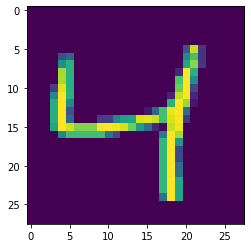

In [48]:
# Let's draw the image from the input data to make sure the prediction result.

test_image = input.reshape(28, 28)
plt.figure()
plt.imshow(test_image, interpolation='nearest')

In [49]:
sess.close()

Oct 09 06:12:30.341  INFO [Profiler] Received a termination signal.
Oct 09 06:12:30.341  INFO Profiling summary:
Oct 09 06:12:30.341  INFO [Inference #0-0], [34866005, 113356818)
Oct 09 06:12:30.341  INFO   ExternalOperator: 136820 μs, 0.17 %
Oct 09 06:12:30.341  INFO   Io: 78347 μs, 0.10 %
Oct 09 06:12:30.341  INFO   Total: 78490813 μs
Oct 09 06:12:30.341  INFO 1 inferences executed in 78490813 μs, 0.0 fps
Oct 09 06:12:30.341  INFO session has been destroyed
